# Pyber Ride Sharing

### Analysis
-  Trend 1: There will be more people/rides in urban settings because they are more people per area. 
-  Trend 2: Average fare is pretty condensed to be about the same range in urban settings, however for rural areas, the fare costs can range a lot, most likely since locations may be further apart. 
-  Trend 3: Urban areas are the most profitable because there will be more people willing to take ride shares to get around. 

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Import the CSV files 
city_path = os.path.join("raw_data", "city_data.csv") 
ride_path = os.path.join("raw_data", "ride_data.csv") 

# Read it into pandas dataframe
city_df = pd.read_csv(city_path)
#city_df
ride_df = pd.read_csv(ride_path)
#ride_df

ride_city_merge = pd.merge(ride_df, city_df, on="city", how="left")
ride_city_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
groupby_city_and_type = ride_city_merge.groupby(["type", "city"])
#groupby_city_and_type.count()

# Find the average fare, total number of rides, and total number of drivers per city
average_fare_city_and_type = groupby_city_and_type["fare"].mean()
#average_fare_city_and_type.head()
total_rides_city_and_type = groupby_city_and_type["city"].count()
#total_rides_city_and_type.head()
total_drivers_city_and_type = groupby_city_and_type["driver_count"].sum()
#total_drivers_city_and_type

combined_df = pd.DataFrame({
    "avg_fare": average_fare_city_and_type, 
    "total_rides": total_rides_city_and_type, 
    "total_drivers": total_drivers_city_and_type
})
#combined_df.head()
combined_df["type"] = combined_df.index.map(lambda x: x[0])
combined_df["city"] = combined_df.index.map(lambda x: x[1])
#combined_df
rural_df = combined_df.loc[combined_df["type"] == "Rural"]
suburban_df = combined_df.loc[combined_df["type"] == "Suburban"]
urban_df = combined_df.loc[combined_df["type"] == "Urban"]
# print(rural_df)
# print(suburban_df)
# print(urban_df)

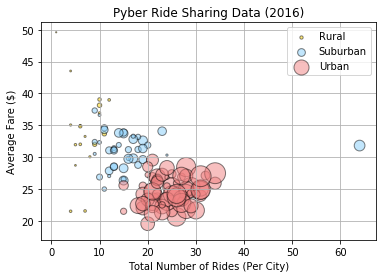

In [3]:
# Specify the x-axis, y-axis, and size values for each city type 
rural_x = rural_df["total_rides"]
rural_y = rural_df["avg_fare"]
rural_size = rural_df["total_drivers"] / 5

suburban_x = suburban_df["total_rides"]
suburban_y = suburban_df["avg_fare"]
suburban_size = suburban_df["total_drivers"] / 5

urban_x = urban_df["total_rides"] 
urban_y = urban_df["avg_fare"] 
urban_size = urban_df["total_drivers"] / 5

# Plot 3 separate scatterplots for each city type 
rural_handle = plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_size, alpha=0.5, label="Rural")
suburban_handle = plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_size, alpha=0.5, label="Suburban")
urban_handle = plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_size, alpha=0.5, label="Urban")

# Create a legend for the scatterplots 
plt.legend(handles=[rural_handle, suburban_handle, urban_handle], loc="best")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#plt.xlim(0, max(combined_df["total_rides"]) + 5) 
#plt.ylim(0, max(combined_df["avg_fare"]) + 5)
plt.grid()

plt.show()

## Total Fares by City Type

In [4]:
# Groupby City Type first
groupby_type = ride_city_merge.groupby("type") 

# Find the total fare cost for all cities 
total_fares_all = ride_city_merge["fare"].sum()

# Find the total fares by city type, then the percentage 
total_fares_city_type = groupby_type["fare"].sum()
total_fares_percent = total_fares_city_type / total_fares_all * 100
#total_fares_percent

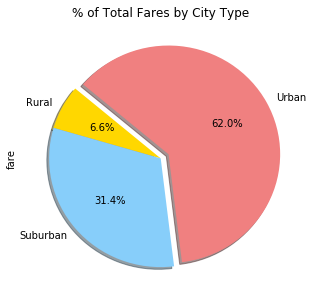

In [5]:
explode = (0, 0, 0.08)
colors = ["gold", "lightskyblue", "lightcoral"]

total_fares_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, figsize=(5, 5))

plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

In [6]:
# Find the total rides for all cities 
total_rides_all = len(ride_city_merge)
#total_rides_all = groupby_type["city"].count().sum()
#total_rides_all

# Find the count for total rides by city type, then percentage 
total_rides_city_type = groupby_type["city"].count()
total_rides_percent = total_rides_city_type / total_rides_all * 100
#total_rides_percent

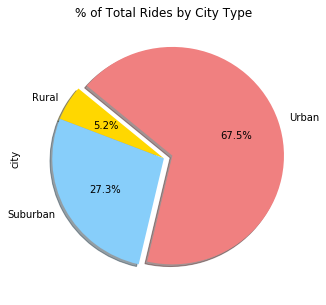

In [7]:
explode = (0, 0, 0.08)
colors = ["gold", "lightskyblue", "lightcoral"]

total_rides_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, figsize=(5, 5))

plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [8]:
# Find the total drivers for all cities 
total_drivers_all = ride_city_merge["driver_count"].sum()
#total_drivers_all = groupby_type["driver_count"].sum().sum()
#total_drivers_all

# Find the total drivers by city type, then the percentage 
total_drivers_city_type = groupby_type["driver_count"].sum()
total_drivers_percent = total_drivers_city_type / total_drivers_all * 100
#total_drivers_percent

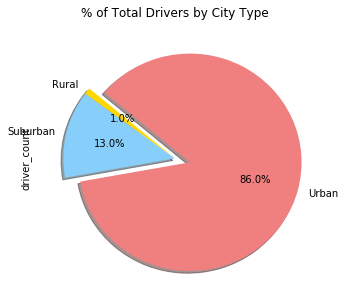

In [9]:
explode = (0, 0, 0.14)
colors = ["gold", "lightskyblue", "lightcoral"]

total_drivers_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, figsize=(5, 5))

plt.title("% of Total Drivers by City Type")
plt.show()